[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/joshmaglione/CS102-Jupyter/main?labpath=.%2FWeek07.ipynb) 

<a href="https://colab.research.google.com/github/joshmaglione/CS102-Jupyter/blob/main/Week07.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

[View on GitHub](https://github.com/joshmaglione/CS102-Jupyter/blob/main/Week07.ipynb)

# Week 7: Working with DataFrames

Last time we discussed the three main data structures `pandas` brings.

Now we will discuss how to manipulate the primary object: DataFrames.

Let's load in UN data about Ireland from two files sources: 
- `data/01_below_poverty.csv`
- `data/07_renewable_energy.csv`

(This was obtained from the [United Nations' SDG Country Profile Page](https://unstats.un.org/sdgs/dataportal/countryprofiles/IRL))

This data has lots of information that we don't need, so our goal is to produce one DataFrame with the information we want. 

In [1]:
import numpy as np
import pandas as pd
print(f"pandas version: {pd.__version__}")
# pandas seems to be getting ready for their 3.0 update.
pd.options.mode.copy_on_write = True		# Turn off other warnings as well.

pandas version: 2.2.0


You can [read more](https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#copy-on-write) about their upcoming changes to `pandas 3.0`.

## Below Poverty Data Set

We'll work through some of the basics with the below poverty data set.

In [2]:
df1 = pd.read_csv("data/01_below_poverty.csv")
df1.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,BasePeriod,Source,GeoInfoUrl,FootNote,Age,Location,Nature,Reporting Type,Sex,Units
0,1.0,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,372.0,Ireland,1987.0,0.7,1987.0,...,2017.0,"Poverty and Inequality Portal, World Bank",NaN,"Accessed March 21, 2023. Based on data from SI...",ALLAGE,ALLAREA,G,G,BOTHSEX,PERCENT
1,1.0,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,372.0,Ireland,1994.0,0.2,1994.0,...,2017.0,"Poverty and Inequality Portal, World Bank",NaN,"Accessed March 21, 2023. Based on data from LI...",ALLAGE,ALLAREA,G,G,BOTHSEX,PERCENT
2,1.0,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,372.0,Ireland,1995.0,0.2,1995.0,...,2017.0,"Poverty and Inequality Portal, World Bank",NaN,"Accessed March 21, 2023. Based on data from LI...",ALLAGE,ALLAREA,G,G,BOTHSEX,PERCENT
3,1.0,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,372.0,Ireland,1996.0,0.2,1996.0,...,2017.0,"Poverty and Inequality Portal, World Bank",NaN,"Accessed March 21, 2023. Based on data from LI...",ALLAGE,ALLAREA,G,G,BOTHSEX,PERCENT
4,1.0,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,372.0,Ireland,2000.0,0.2,2000.0,...,2017.0,"Poverty and Inequality Portal, World Bank",NaN,"Accessed March 21, 2023. Based on data from LI...",ALLAGE,ALLAREA,G,G,BOTHSEX,PERCENT


Most of the columns look irrelevant. Let's look to keep the columns
- "TimePeriod"
- "Value"
- "Time_Detail"
- "Age"
- "Location"
- "Sex"

In [3]:
df1 = df1[[
	"TimePeriod",
	"Value",
	"Time_Detail",
	"Age",
	"Location",
	"Sex"
]]
df1.head()

,TimePeriod,Value,Time_Detail,Age,Location,Sex
0,1987.0,0.7,1987.0,ALLAGE,ALLAREA,BOTHSEX
1,1994.0,0.2,1994.0,ALLAGE,ALLAREA,BOTHSEX
2,1995.0,0.2,1995.0,ALLAGE,ALLAREA,BOTHSEX
3,1996.0,0.2,1996.0,ALLAGE,ALLAREA,BOTHSEX
4,2000.0,0.2,2000.0,ALLAGE,ALLAREA,BOTHSEX


It's weird that `"TimePeriod"` is a float. Let's change this to an int.

In [4]:
# df1.astype({"TimePeriod" : "i"})

We need to clean our data before we can manipulate it. Let's remove the rows where `"TimePeriod"` is empty.

In [5]:
df1 = df1.dropna(subset="TimePeriod")
df1 = df1.astype({"TimePeriod" : "i"})
df1

,TimePeriod,Value,Time_Detail,Age,Location,Sex
0,1987,0.70000,1987.0,ALLAGE,ALLAREA,BOTHSEX
1,1994,0.20000,1994.0,ALLAGE,ALLAREA,BOTHSEX
2,1995,0.20000,1995.0,ALLAGE,ALLAREA,BOTHSEX
3,1996,0.20000,1996.0,ALLAGE,ALLAREA,BOTHSEX
4,2000,0.20000,2000.0,ALLAGE,ALLAREA,BOTHSEX
...,...,...,...,...,...,...
145,2020,0.15064,2020.0,15-64,ALLAREA,BOTHSEX
146,2020,0.08503,2020.0,<15Y,ALLAREA,BOTHSEX
147,2020,0.10854,2020.0,ALLAGE,URBAN,BOTHSEX
148,2020,0.19978,2020.0,ALLAGE,RURAL,BOTHSEX


We are not going to span the entirity of this data set. Let's just take the years 2005 to 2020.

We'll do this with the [`query`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) command. 

At a basic level it takes a string that appropriately masks part of the dataframe.

By default, `query` is a copy, unlike slicing in `ndarray` which yields a view.

In [6]:
df1 = df1.query("2005 <= TimePeriod <= 2020")
df1

,TimePeriod,Value,Time_Detail,Age,Location,Sex
22,2005,0.00000,2005.0,ALLAGE,ALLAREA,BOTHSEX
23,2005,0.03139,2005.0,15-64,ALLAREA,BOTHSEX
24,2005,0.03699,2005.0,65+,ALLAREA,BOTHSEX
25,2005,0.02371,2005.0,ALLAGE,ALLAREA,FEMALE
26,2005,0.03108,2005.0,ALLAGE,ALLAREA,MALE
...,...,...,...,...,...,...
145,2020,0.15064,2020.0,15-64,ALLAREA,BOTHSEX
146,2020,0.08503,2020.0,<15Y,ALLAREA,BOTHSEX
147,2020,0.10854,2020.0,ALLAGE,URBAN,BOTHSEX
148,2020,0.19978,2020.0,ALLAGE,RURAL,BOTHSEX


The `"Time_Detail"` column looks irrelevant. 

Let's look at all the values and the number of time they arise with [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [7]:
df1["Time_Detail"].value_counts()

Time_Detail
2005.0    8
2006.0    8
2007.0    8
2008.0    8
2009.0    8
2010.0    8
2011.0    8
2012.0    8
2013.0    8
2014.0    8
2015.0    8
2016.0    8
2017.0    8
2018.0    8
2019.0    8
2020.0    8
Name: count, dtype: int64

In [8]:
df1 = df1.drop(["Time_Detail"], axis=1)
df1

,TimePeriod,Value,Age,Location,Sex
22,2005,0.00000,ALLAGE,ALLAREA,BOTHSEX
23,2005,0.03139,15-64,ALLAREA,BOTHSEX
24,2005,0.03699,65+,ALLAREA,BOTHSEX
25,2005,0.02371,ALLAGE,ALLAREA,FEMALE
26,2005,0.03108,ALLAGE,ALLAREA,MALE
...,...,...,...,...,...
145,2020,0.15064,15-64,ALLAREA,BOTHSEX
146,2020,0.08503,<15Y,ALLAREA,BOTHSEX
147,2020,0.10854,ALLAGE,URBAN,BOTHSEX
148,2020,0.19978,ALLAGE,RURAL,BOTHSEX


The last four columns are potentially irrelevant. Let's see what the possibilities are for 
- "Age"
- "Location"
- "Sex"

We want the most inclusive options.

Let's look at the rows for one particular year. 

In [9]:
df1.query("2011 == TimePeriod")

,TimePeriod,Value,Age,Location,Sex
70,2011,0.50000,ALLAGE,ALLAREA,BOTHSEX
71,2011,0.08366,<15Y,ALLAREA,BOTHSEX
72,2011,0.67060,15-64,ALLAREA,BOTHSEX
73,2011,0.65755,65+,ALLAREA,BOTHSEX
74,2011,0.40174,ALLAGE,ALLAREA,FEMALE
75,2011,0.69121,ALLAGE,ALLAREA,MALE
76,2011,0.59732,ALLAGE,RURAL,BOTHSEX
77,2011,0.51095,ALLAGE,URBAN,BOTHSEX


The data set has lots of granularity. Let's just take the coarse, general information.

We'll do this by chaining three queries. 

In comments, we have an equivalent version, but it is generally considered good practice to chain as follows.

*This is just for aesthetic and reabability reasons.*

In [10]:
# df1 = df1[
# 	(df1["Age"] == "ALLAGE") & 
# 	(df1["Location"] == "ALLAREA") &
# 	(df1["Sex"] == "BOTHSEX")
# ]
df1 = (df1
    .query("Age == 'ALLAGE'")
    .query("Location == 'ALLAREA'")
    .query("Sex == 'BOTHSEX'")
)
df1

,TimePeriod,Value,Age,Location,Sex
22,2005,0.0,ALLAGE,ALLAREA,BOTHSEX
37,2006,0.4,ALLAGE,ALLAREA,BOTHSEX
38,2007,0.1,ALLAGE,ALLAREA,BOTHSEX
53,2008,0.2,ALLAGE,ALLAREA,BOTHSEX
54,2009,0.5,ALLAGE,ALLAREA,BOTHSEX
69,2010,0.5,ALLAGE,ALLAREA,BOTHSEX
70,2011,0.5,ALLAGE,ALLAREA,BOTHSEX
79,2012,0.3,ALLAGE,ALLAREA,BOTHSEX
93,2013,0.7,ALLAGE,ALLAREA,BOTHSEX
94,2014,0.4,ALLAGE,ALLAREA,BOTHSEX


Now that the last three columns are constant, we will drop them.

In [11]:
df1 = df1.drop(["Age", "Location", "Sex"], axis=1)
df1

,TimePeriod,Value
22,2005,0.0
37,2006,0.4
38,2007,0.1
53,2008,0.2
54,2009,0.5
69,2010,0.5
70,2011,0.5
79,2012,0.3
93,2013,0.7
94,2014,0.4


The current index is also irrelevant. Let's convert `"TimePeriod"` to our index. 

In [12]:
df1 = df1.set_index("TimePeriod")
df1

,Value
TimePeriod,
2005,0.0
2006,0.4
2007,0.1
2008,0.2
2009,0.5
2010,0.5
2011,0.5
2012,0.3
2013,0.7


Lastly, let's change `"Value"` to `"Below Poverty (%)"`.

In [13]:
df1 = df1.rename(columns={"Value" : "Below Poverty (%)"})
df1

,Below Poverty (%)
TimePeriod,
2005,0.0
2006,0.4
2007,0.1
2008,0.2
2009,0.5
2010,0.5
2011,0.5
2012,0.3
2013,0.7


## Speedrun: Renewable Energy Data Set

We will basically do the same steps as above, but all at once. See if you can follow along line by line.

In [14]:
df2 = pd.read_csv("data/07_renewable_energy.csv")
df2 = df2[["TimePeriod", "Value"]]
df2 = df2.dropna()
df2 = df2.astype({"TimePeriod" : "i"})
df2 = df2.set_index("TimePeriod")
df2 = df2.loc["2005":"2020"]
df2 = df2.rename(columns={"Value" : "Renewable Energy Share (%)"})
df2

,Renewable Energy Share (%)
TimePeriod,
2005,2.89
2006,3.23
2007,3.55
2008,4.19
2009,5.30
2010,5.29
2011,6.96
2012,6.90
2013,7.71


## From two to one

Because our two DataFrames have the same index, we can concatenate them in `pandas`.

In [15]:
df = pd.concat([df1, df2], axis=1)		# Merging our two DataFrames
df.index.names = ["Year"]				# Renaming the index
df

,Below Poverty (%),Renewable Energy Share (%)
Year,,
2005,0.0,2.89
2006,0.4,3.23
2007,0.1,3.55
2008,0.2,4.19
2009,0.5,5.30
2010,0.5,5.29
2011,0.5,6.96
2012,0.3,6.90
2013,0.7,7.71


#### Detour: visualization

We'll discuss this more later, but we can now plot the DataFrame on a set of axes with `Matplotlib` (working in the background).

<Axes: xlabel='Year'>

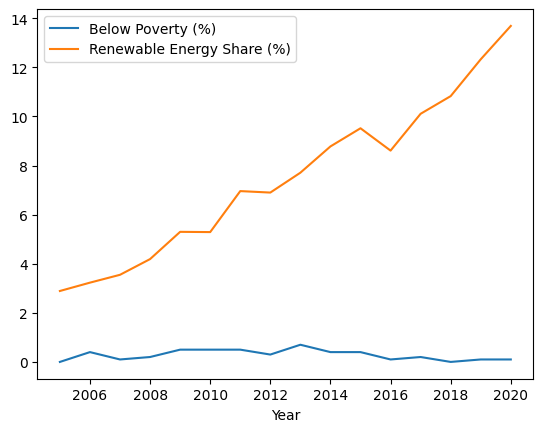

In [16]:
df.plot()

## Ufuncs

All the `NumPy` UFuncs can be applied to DataFrames, provided they are applied to appropriate numerical data. 

First let's generate some random data.

In [17]:
N = 5

# Generate some random data with N + 1 rows
IDs = np.arange(2*N)
np.random.shuffle(IDs)
ID1 = IDs[:N + 1].copy()
ID1.sort()
df1 = np.floor(pd.DataFrame({
	"Height (cm)" : np.random.normal(168, 8, N + 1),
	"Weight (km)" : np.random.normal(82, 9, N + 1),
}, index=ID1)).astype("i")
df1

,Height (cm),Weight (km)
0,159,74
2,161,70
4,159,96
6,166,86
8,161,78
9,178,79


In [18]:
# Generate more random data with N + 2 rows
np.random.shuffle(IDs)
ID2 = IDs[:N + 2].copy()
ID2.sort()
df2 = np.floor(pd.DataFrame({
	"Age (y)" : np.random.normal(40, 5, N + 2),
	"Heart rate (bpm)" : np.random.normal(78, 9, N + 2),
}, index=ID2)).astype("i")
df2

,Age (y),Heart rate (bpm)
0,47,100
1,36,72
3,48,75
4,36,82
7,44,78
8,39,91
9,50,78


By using Ufuncs on Series, we can compute a BMI column in the first data set.

In [19]:
df1["BMI"] = np.round(df1["Weight (km)"] / (df1["Height (cm)"]/100)**2).astype("i")
df1

,Height (cm),Weight (km),BMI
0,159,74,29
2,161,70,27
4,159,96,38
6,166,86,31
8,161,78,30
9,178,79,25


Before we continue to, it will be useful to use the following utility function.

In [20]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Concatenation

We have already seen a special case of concatenation, but that had the benefit of having indices the same.

We can concatenate the two dataframes to get

In [21]:
pd.concat([df1, df2], axis=1, sort=True)

,Height (cm),Weight (km),BMI,Age (y),Heart rate (bpm)
0,159.0,74.0,29.0,47.0,100.0
1,NaN,NaN,NaN,36.0,72.0
2,161.0,70.0,27.0,NaN,NaN
3,NaN,NaN,NaN,48.0,75.0
4,159.0,96.0,38.0,36.0,82.0
6,166.0,86.0,31.0,NaN,NaN
7,NaN,NaN,NaN,44.0,78.0
8,161.0,78.0,30.0,39.0,91.0
9,178.0,79.0,25.0,50.0,78.0


We may want to *exclude* those rows that are not complete. We can do this by setting `join="inner"`.

In [22]:
pd.concat([df1, df2], axis=1, join="inner", sort=True)

,Height (cm),Weight (km),BMI,Age (y),Heart rate (bpm)
0,159,74,29,47,100
4,159,96,38,36,82
8,161,78,30,39,91
9,178,79,25,50,78


The default is `join="outer"`.

Another example taken from the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-logic-of-the-resulting-axis).

In [23]:
dfa = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

dfb = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

result = pd.concat([dfa, dfb], axis=1)

In [24]:
display('dfa', 'dfb', 'result')

dfa
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

dfb
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

result
     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7

## Merging

Merging is similar to concatenation, but significantly different. 😅

In [25]:
display('dfa', 'dfb', 'dfa.merge(dfb)')

dfa
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

dfb
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

dfa.merge(dfb)
    A   B   C   D   F
0  A2  B2  C2  D2  F2
1  A3  B3  C3  D3  F3

Unlike with concatenation, DataFrames are joined by default using `'inner'`, but with the `how` keyword argument.

With `merge`, there are many more options. One can set `how` to be:
- `inner`
- `outer`
- `left`
- `right`
- `cross`

In [26]:
display('dfa', 'dfb', 'dfa.merge(dfb, how="outer")')

dfa
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

dfb
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

dfa.merge(dfb, how="outer")
     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2   F2
3   A3  B3   C3  D3   F3
4  NaN  B6  NaN  D6   F6
5  NaN  B7  NaN  D7   F7

By default, the largest set of compatible columns are choosen. 

We can merge on fewer columns by changing the `on` keyword argument.